In [17]:
import csv
def read_csv(filename):   # returns dictionary of lists, good for working with graphs
    data = {'nodes': [], 'cpus': [], 'time': [], 'err': [], 'qual': [],'time_dt': [],'err_dt': [],'qual_dt': []}
    with open(filename, newline='') as csvfile:
        rdr = csv.reader(csvfile, delimiter=',')
        try:
            row = rdr.__next__()
        except StopIteration as si:
            return None

        prev_cpu = int(row[1])
        prev_node = int(row[0])
        temp_list = {'nodes': [], 'cpus': [], 'time': [], 'err': [], 'qual': [],'time_dt': [],'err_dt': [],'qual_dt': []}
        continue_while = True
        while continue_while:
            if prev_cpu == int(row[1]) and prev_node == int(row[0]):
                temp_list['nodes'].append(int(row[0]))
                temp_list['cpus'].append(int(row[1]))
                temp_list['time'].append(float(row[2]))
                temp_list['err'].append(float(row[3]))
                temp_list['qual'].append(float(row[4]))
            else:
                data['nodes'].append(temp_list['nodes'][0])
                data['cpus'].append(temp_list['cpus'][0])
                data['time'].append(np.mean(temp_list['time']))
                data['err'].append(np.mean(temp_list['err']))
                data['qual'].append(np.mean(temp_list['qual']))
                data['time_dt'].append(np.std(temp_list['time']))
                data['err_dt'].append(np.std(temp_list['err']))
                data['qual_dt'].append(np.std(temp_list['qual']))

                temp_list = {'nodes': [], 'cpus': [], 'time': [], 'err': [], 'qual': [],'time_dt': [],'err_dt': [],'qual_dt': []}

            prev_cpu = int(row[1])
            prev_node = int(row[0])


            try:
                row = rdr.__next__()
            except StopIteration as si:
                continue_while = False

        # last iteration
        data['nodes'].append(temp_list['nodes'][0])
        data['cpus'].append(temp_list['cpus'][0])
        data['time'].append(np.mean(temp_list['time']))
        data['err'].append(np.mean(temp_list['err']))
        data['qual'].append(np.mean(temp_list['qual']))
        data['time_dt'].append(np.mean(temp_list['time']))
        data['err_dt'].append(np.mean(temp_list['err']))
        data['qual_dt'].append(np.mean(temp_list['qual']))

        return data


Tabla de Resultados:
 nodes  cpus      time          err         qual  time_dt       err_dt      qual_dt
     1     1  8.652996 2.073151e-10 5.574530e+08 0.031108 0.000000e+00 1.999861e+06
     1     2  8.963566 1.341985e-08 8.313692e+06 0.064406 0.000000e+00 5.940780e+04
     1     4  8.974993 6.091038e-09 1.829276e+07 0.029445 0.000000e+00 5.984772e+04
     1     8  9.153704 3.091361e-09 3.534074e+07 0.065654 0.000000e+00 2.526590e+05
     1    16  9.795494 1.026328e-09 9.967958e+07 0.451863 0.000000e+00 4.567508e+06
     2     2  8.889750 1.341985e-08 8.382452e+06 0.038557 0.000000e+00 3.626179e+04
     2     4  8.946151 6.091038e-09 1.835165e+07 0.021979 0.000000e+00 4.508522e+04
     2     8  9.025174 3.091361e-09 3.584385e+07 0.061181 0.000000e+00 2.426936e+05
     2    16  9.345083 1.026328e-09 1.042983e+08 0.172235 0.000000e+00 1.911188e+06
     2    32 10.677696 5.351153e-09 1.791486e+07 1.808262 0.000000e+00 2.450603e+06
     4     4  9.146635 6.091038e-09 1.796641e+07 0.283

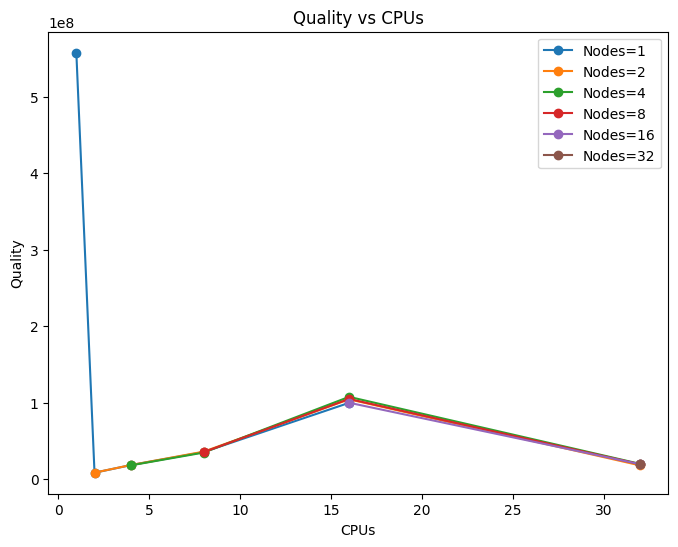

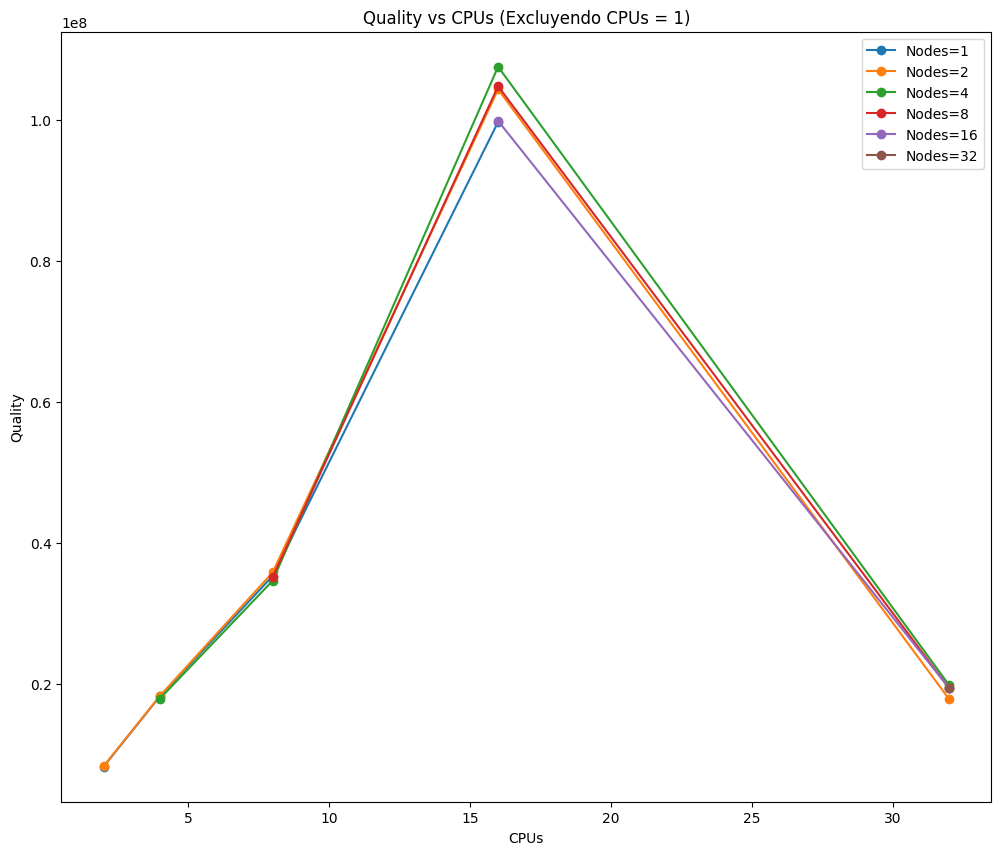

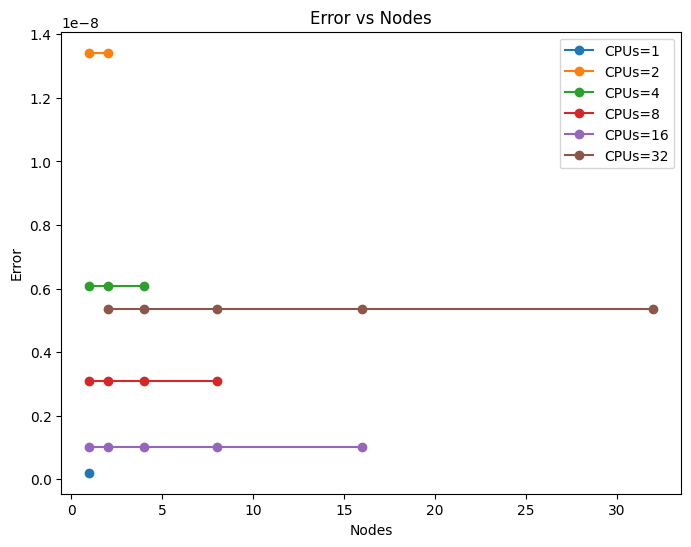

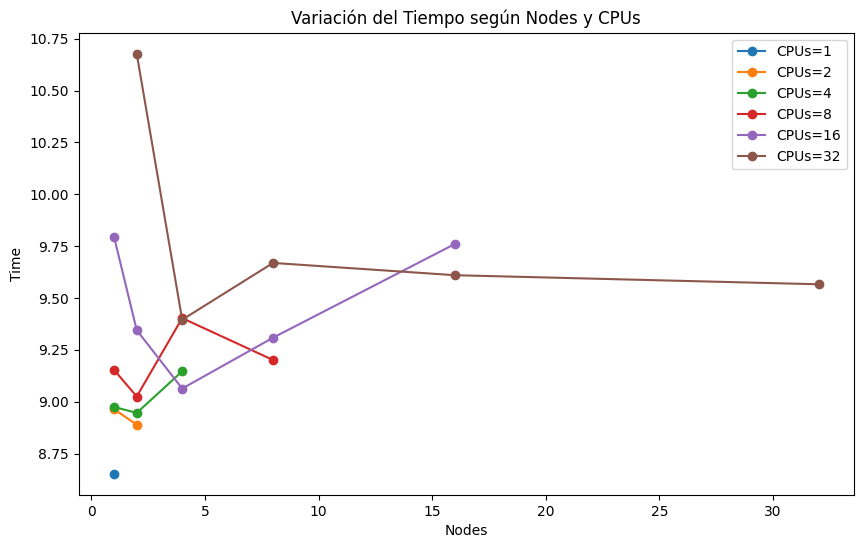

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import time

# Parámetros fijos
fichero = '../1P/out_trapezoids/output-new.csv'
data = read_csv(filename=fichero)

# Crear DataFrames con los resultados
df_resultados = pd.DataFrame(data, columns=['nodes', 'cpus', 'time', 'err', 'qual','time_dt','err_dt','qual_dt'])

# Imprimir las tablas de resultados
print("\nTabla de Resultados:")
print(df_resultados.to_string(index=False))

#Calidad vs CPUS
plt.figure(figsize=(8, 6))
for node_count in df_resultados['cpus'].unique():
    subset = df_resultados[df_resultados['nodes'] == node_count]
    plt.plot(subset['cpus'], subset['qual'], label=f'Nodes={node_count}',marker='o')

plt.xlabel('CPUs')
plt.ylabel('Quality')
plt.title('Quality vs CPUs')
plt.legend()
plt.show()


#Calidad vs CPUS (Excluyendo CPUs = 1)
plt.figure(figsize=(12, 10))
for node_count in df_resultados['cpus'].unique():
    subset = df_resultados[(df_resultados['nodes'] == node_count) & (df_resultados['cpus'] != 1)]
    plt.plot(subset['cpus'], subset['qual'], label=f'Nodes={node_count}', marker='o')

plt.xlabel('CPUs')
plt.ylabel('Quality')
plt.title('Quality vs CPUs (Excluyendo CPUs = 1)')
plt.legend()
plt.show()


#Error vs Nodes
plt.figure(figsize=(8, 6))
for cpu_count in df_resultados['cpus'].unique():
    subset = df_resultados[df_resultados['cpus'] == cpu_count]
    plt.plot(subset['nodes'], subset['err'], label=f'CPUs={cpu_count}',marker='o')

plt.xlabel('Nodes')
plt.ylabel('Error')
plt.title('Error vs Nodes')
plt.legend()
plt.show()

#Time vs Nodes
plt.figure(figsize=(10, 6))
for cpu_count in df_resultados['cpus'].unique():
    subset = df_resultados[df_resultados['cpus'] == cpu_count]
    plt.plot(subset['nodes'], subset['time'], label=f'CPUs={cpu_count}',marker='o')

plt.xlabel('Nodes')
plt.ylabel('Time')
plt.title('Variación del Tiempo según Nodes y CPUs')
plt.legend()
plt.show()


Tabla de Resultados:
 nodes  cpus     time      err       qual  time_dt   err_dt     qual_dt
     1     1 7.091198 0.004103 122.276915 0.837103 0.004016  186.536431
     1     2 6.957402 0.002880  84.562014 0.211954 0.001754   80.652621
     1     4 6.933402 0.003157  65.655718 0.073778 0.001486   52.392538
     1     8 7.134953 0.002569 156.731246 0.100612 0.001699  202.483000
     1    16 7.633140 0.001890 267.706268 0.706019 0.000915  669.625695
     1    32 7.855868 0.001743  78.439044 0.092784 0.000490   19.786778
     2     2 7.167791 0.003544  84.460612 0.418093 0.002475  102.813234
     2     4 6.969820 0.002592  96.348616 0.076490 0.001555   99.191129
     2     8 7.054890 0.002559 179.877434 0.167071 0.001393  395.763172
     2    16 7.240844 0.002438 132.820258 0.087607 0.001287  232.506955
     2    32 7.761800 0.002415  66.380102 0.602045 0.000707   50.570613
     4     4 7.093743 0.001807 158.684520 0.380180 0.001306  151.540440
     4     8 7.041128 0.002882 544.316320 

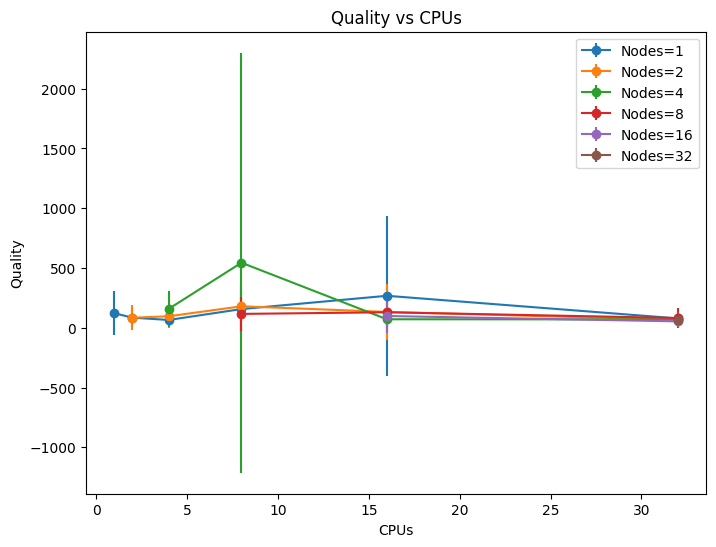

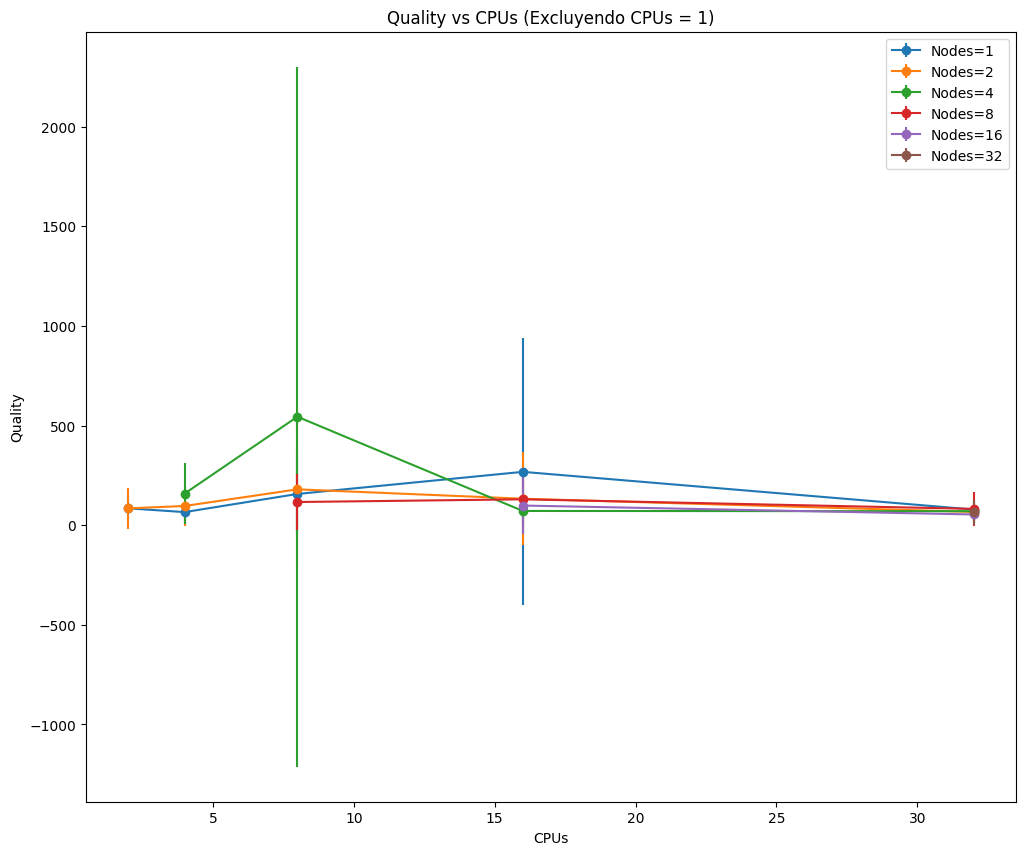

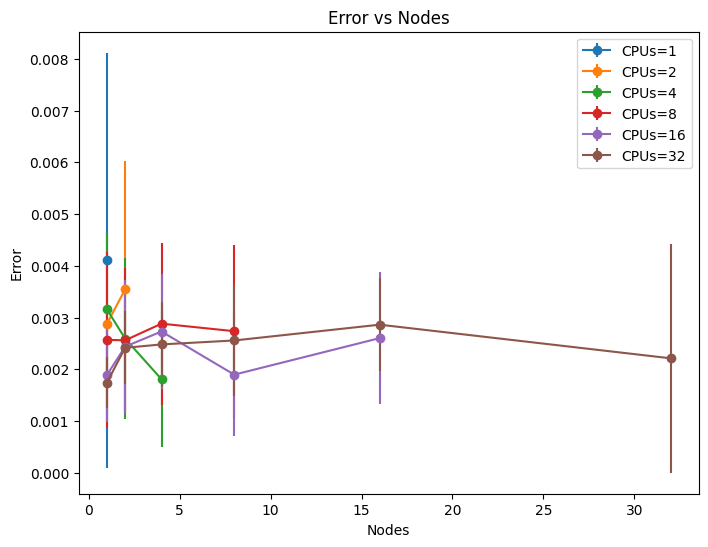

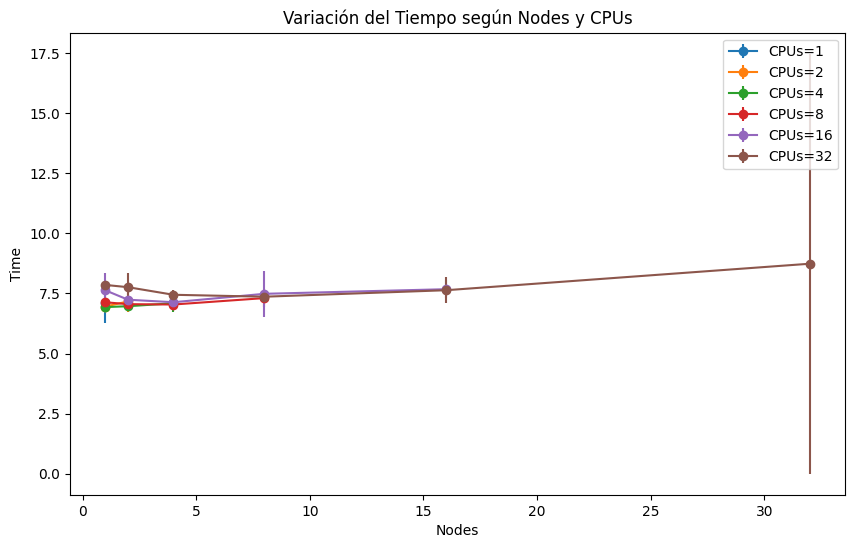

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import time

# Parámetros fijos
fichero = '../1P/out_montecarlo/output.csv'
data = read_csv(filename=fichero)

# Crear DataFrames con los resultados
df_resultados = pd.DataFrame(data, columns=['nodes', 'cpus', 'time', 'err', 'qual','time_dt','err_dt','qual_dt'])

# Imprimir las tablas de resultados
print("\nTabla de Resultados:")
print(df_resultados.to_string(index=False))

#Calidad vs CPUS
plt.figure(figsize=(8, 6))
for node_count in df_resultados['cpus'].unique():
    subset = df_resultados[df_resultados['nodes'] == node_count]
    plt.errorbar(subset['cpus'], subset['qual'], yerr=subset['qual_dt'], label=f'Nodes={node_count}', marker='o')

plt.xlabel('CPUs')
plt.ylabel('Quality')
plt.title('Quality vs CPUs')
plt.legend()
plt.show()



#Calidad vs CPUS (Excluyendo CPUs = 1)
plt.figure(figsize=(12, 10))
for node_count in df_resultados['cpus'].unique():
    subset = df_resultados[(df_resultados['nodes'] == node_count) & (df_resultados['cpus'] != 1)]
    plt.errorbar(subset['cpus'], subset['qual'], yerr=subset['qual_dt'], label=f'Nodes={node_count}', marker='o')

plt.xlabel('CPUs')
plt.ylabel('Quality')
plt.title('Quality vs CPUs (Excluyendo CPUs = 1)')
plt.legend()
plt.show()


#Error vs Nodes
plt.figure(figsize=(8, 6))
for cpu_count in df_resultados['cpus'].unique():
    subset = df_resultados[df_resultados['cpus'] == cpu_count]
    plt.errorbar(subset['nodes'], subset['err'], yerr=subset['err_dt'], label=f'CPUs={cpu_count}', marker='o')

plt.xlabel('Nodes')
plt.ylabel('Error')
plt.title('Error vs Nodes')
plt.legend()

#Time vs Nodes
plt.figure(figsize=(10, 6))
for cpu_count in df_resultados['cpus'].unique():
    subset = df_resultados[df_resultados['cpus'] == cpu_count]
    plt.errorbar(subset['nodes'], subset['time'], yerr=subset['time_dt'], label=f'CPUs={cpu_count}', marker='o')

plt.xlabel('Nodes')
plt.ylabel('Time')
plt.title('Variación del Tiempo según Nodes y CPUs')
plt.legend()
plt.show()
